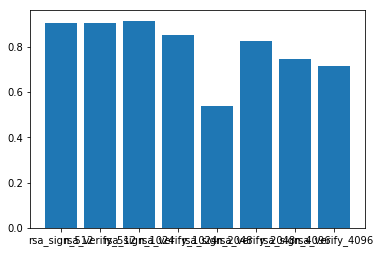

In [1]:
import matplotlib.pyplot as plt
from asq.initiators import query
import json

workload_name = []
workload_score = []
project_name = 'workspace'

with open("qpi.json".format(project_name)) as result:
    final = json.load(result)

qpi = query(final['nodes']).where(lambda child: child['name'] == 'node-9') \
        .select_many(lambda child: child['sections']) \
        .where(lambda child: child['name'] == 'SSL') \
        .select_many(lambda child: child['metrics']).to_list()

for wl in qpi[0]['workloads']:
    workload_name.append(wl['name'])
    workload_score.append(wl['score'])

x_axis = range(len(workload_name))

plt.bar(x_axis, workload_score)
plt.xticks(x_axis, workload_name)
plt.show()